<a href="https://colab.research.google.com/github/kcat28/CCDATS1L_EXERCISES_COM221ML/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [94]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'corona-virus-report' dataset.
Path to dataset files: /kaggle/input/corona-virus-report


In [95]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [97]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [98]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

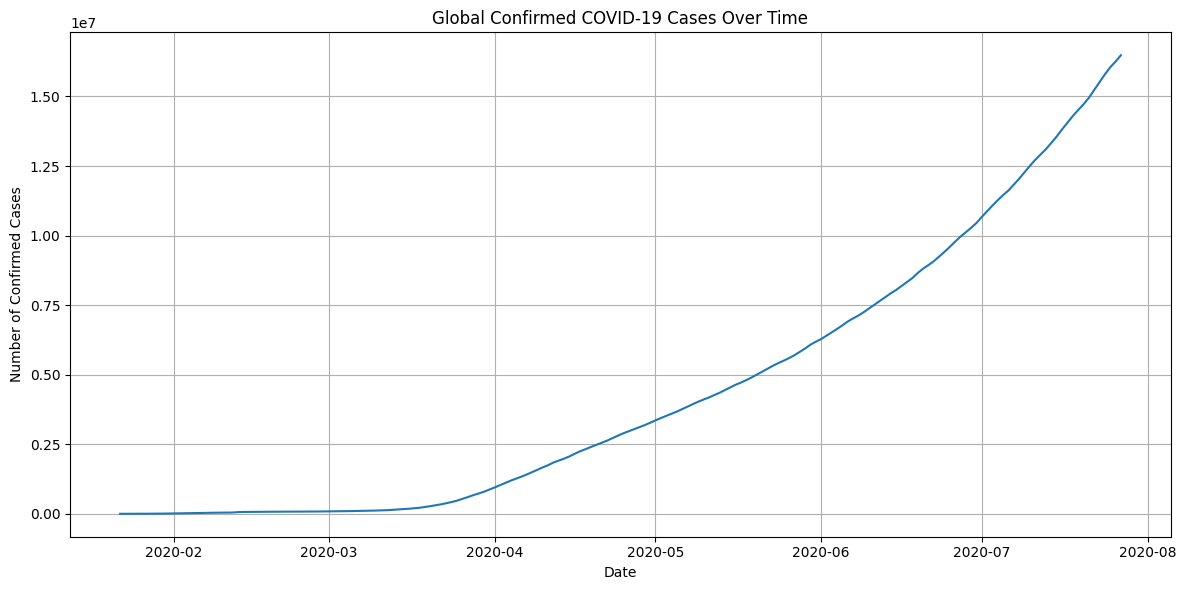

In [99]:
# put your answer here
import matplotlib.pyplot as plt
import seaborn as sns

global_cases = df.groupby('Date')['Confirmed'].sum().reset_index()
global_cases['Date'] = pd.to_datetime(global_cases['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=global_cases)
plt.title('Global Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

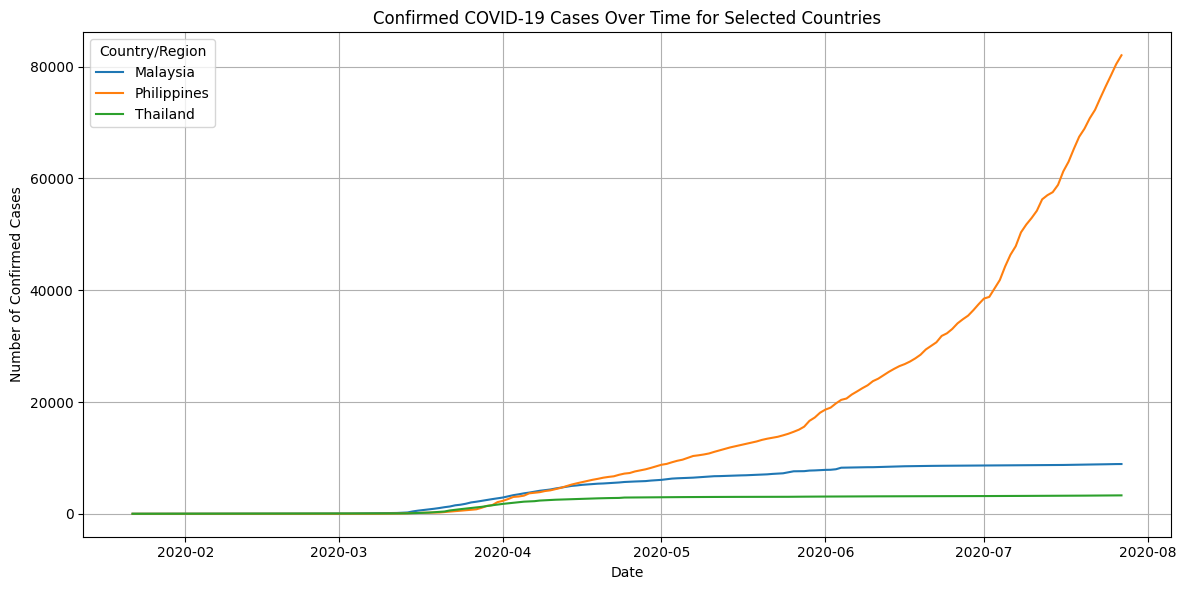

In [100]:
selected_countries = ['Philippines', 'Thailand', 'Malaysia']
country_cases = df[df['Country/Region'].isin(selected_countries)].copy()

country_cases['Date'] = pd.to_datetime(country_cases['Date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=country_cases, hue='Country/Region')
plt.title('Confirmed COVID-19 Cases Over Time for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

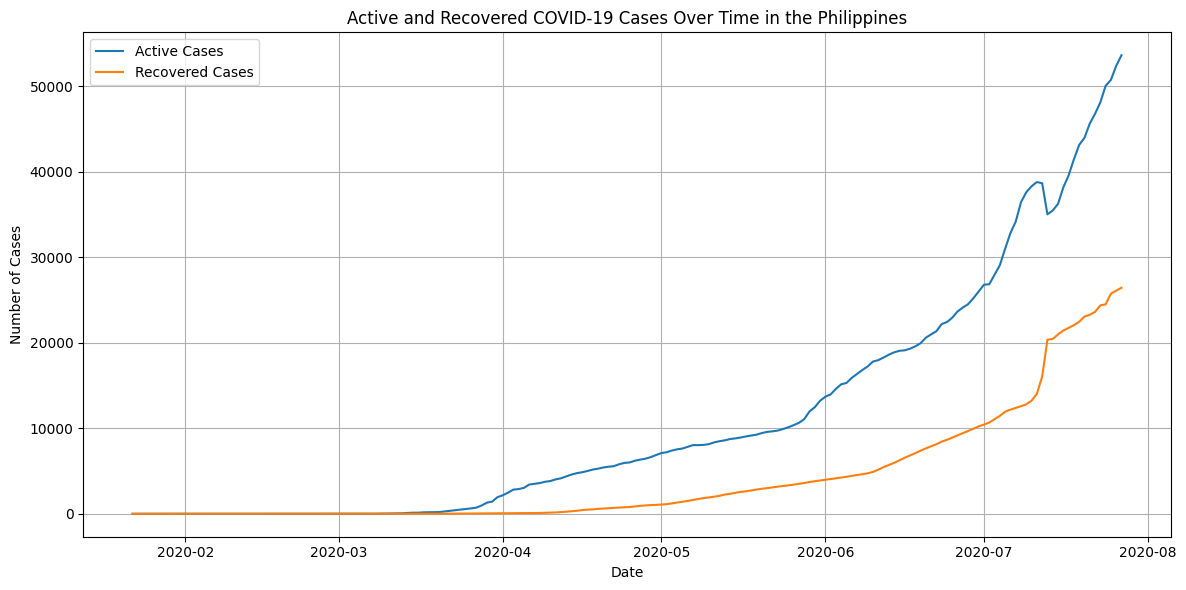

In [101]:
# put your answer here
philippines = df[df['Country/Region'] == 'Philippines'].copy()
philippines_cases = philippines.groupby('Date')[['Active', 'Recovered']].sum().reset_index()
philippines_cases['Date'] = pd.to_datetime(philippines_cases['Date'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Active', data=philippines_cases, label='Active Cases')
sns.lineplot(x='Date', y='Recovered', data=philippines_cases, label='Recovered Cases')
plt.title('Active and Recovered COVID-19 Cases Over Time in the Philippines')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

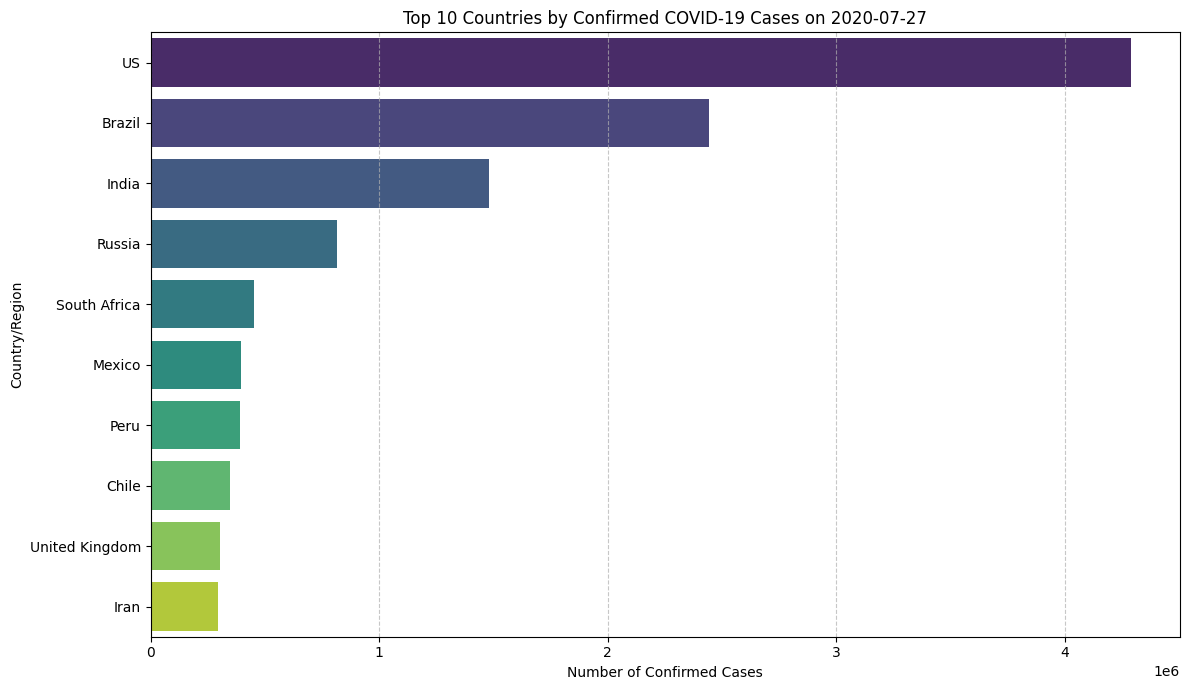

In [102]:
latest_date = df['Date'].max()
df_single_date = df[df['Date'] == latest_date]

top_countries = df_single_date.groupby('Country/Region')['Confirmed'].sum().reset_index()
top_10_countries = top_countries.nlargest(10, 'Confirmed')

plt.figure(figsize=(12, 7))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_countries, hue='Country/Region', palette='viridis', legend=False)
plt.title(f'Top 10 Countries by Confirmed COVID-19 Cases on {latest_date}')
plt.xlabel('Number of Confirmed Cases')
plt.ylabel('Country/Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

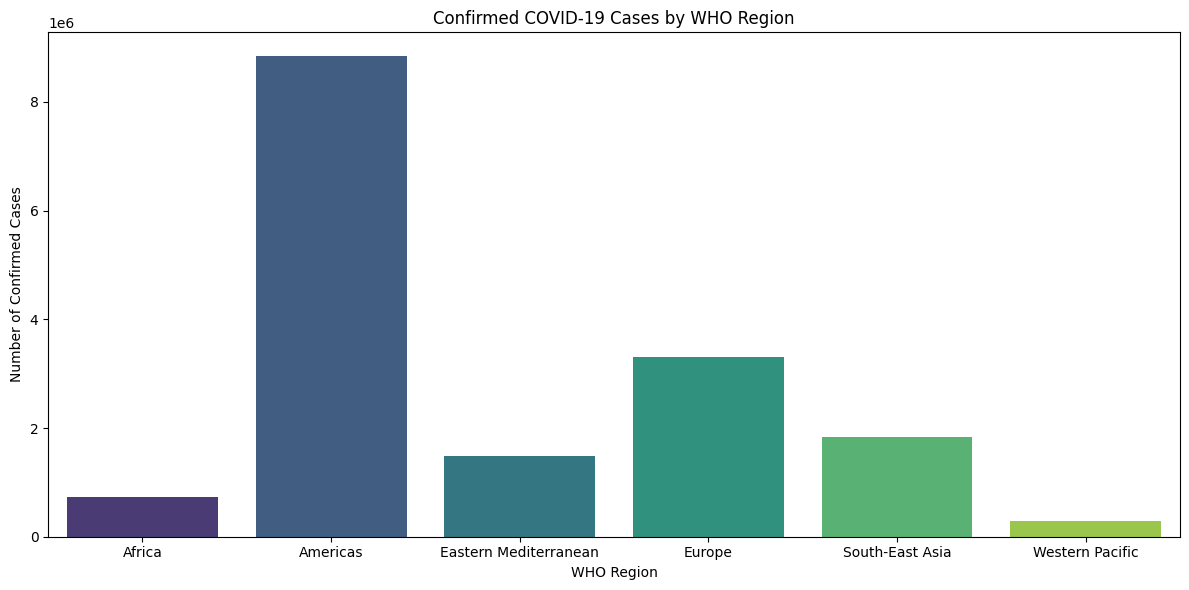

In [103]:
# put your answer here
max_date = df['Date'].max()
region_cases = df[df['Date'] == max_date].groupby('WHO Region')['Confirmed'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='WHO Region', y='Confirmed', data=region_cases, palette='viridis', hue='WHO Region', legend=False)
plt.title('Confirmed COVID-19 Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Number of Confirmed Cases')
plt.tight_layout()
plt.show()

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [104]:
import folium
import pandas as pd

map_date = df['Date'].max()
map_df = df[df['Date'] == map_date].copy()

map_data = map_df.groupby(['Country/Region', 'Lat', 'Long'])['Confirmed'].sum().reset_index()

map_data = map_data.dropna(subset=['Lat', 'Long'])
map_data = map_data[map_data['Confirmed'] > 0]
m = folium.Map(location=[map_data['Lat'].mean(), map_data['Long'].mean()], zoom_start=2)


for idx, row in map_data.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=max(min(row['Confirmed']**0.3, 20), 2),
        popup=f"<b>Country:</b> {row['Country/Region']}<br>"
              f"<b>Confirmed Cases:</b> {row['Confirmed']}<br>"
              f"<b>Date:</b> {map_date}",
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(m)

display(m)


7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [106]:
import folium
import pandas as pd

who_region = "Americas"
map_date = df['Date'].max()
df_region_latest = df[(df['WHO Region'] == who_region) & (df['Date'] == map_date)].copy()

map_data_country = df_region_latest.groupby(['Country/Region', 'Lat', 'Long'])['Confirmed'].sum().reset_index()
map_data_clean = map_data_country.dropna(subset=['Lat', 'Long'])

if not map_data_clean.empty:
    center_lat = map_data_clean['Lat'].mean()
    center_lon = map_data_clean['Long'].mean()
else:
    print(f"No valid latitude/longitude data for {who_region} on {map_date}. Using default center.")
    center_lat = 0
    center_lon = 0

m = folium.Map(location=[center_lat, center_lon], zoom_start=3)

for idx, row in map_data_clean.iterrows():
    if row['Confirmed'] > 0:
        folium.CircleMarker(
            location=[row['Lat'], row['Long']],
            radius=max(min(row['Confirmed']**0.3, 20), 2),
            popup=f"<b>Country:</b> {row['Country/Region']}<br>"
                  f"<b>Confirmed Cases:</b> {row['Confirmed']}<br>"
                  f"<b>Date:</b> {map_date}",
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        ).add_to(m)

display(m)
